In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

itemdf = pd.read_excel("StockDB.xlsx", sheet_name='Item')
#categorydf = pd.read_excel("StockDB.xlsx", sheet_name='Category')
transMasterdf = pd.read_excel("StockDB.xlsx", sheet_name='STK_TransMaster')
transDetailsdf= pd.read_excel("StockDB.xlsx", sheet_name='STK_TransDetails')

In [2]:
transDetailsdf.head()

,TransType,TransDate,Year,TransNO,InvRefNo,StoreFr,StoreTo,PSID,LCID,LCDate,Remarks,TransSl,ItemID,Unit,Qty,Rate,Amount,UserPc,UserId,InTime,IP,UpdatePC,UpdateUserID,UpdateTime,UpdateIP
0,BUY,2018-08-31,2018,1,NaN,NaN,S01,NaN,102050100001,1.0,OPENING STOCK,1,10010001,CARTON,2013,1700.0,3422100.0,mi3-wtr1,10101,2018-09-16 16:41:00,70.32.29.156,WIN-COP36UURNHE,10101.0,2020-05-20 02:40:00,103.3.164.161
1,BUY,2018-08-31,2018,1,NaN,NaN,S01,NaN,102050100001,1.0,OPENING STOCK,10,10010012,CARTON,64,1940.0,124160.0,mi3-wtr1,10101,2018-10-31 19:43:00,70.32.29.156,mi3-wtr1,10101.0,2019-10-01 17:10:00,162.249.5.171
2,BUY,2018-08-31,2018,1,NaN,NaN,S01,NaN,102050100001,1.0,OPENING STOCK,11,10010014,CARTON,20,1732.0,34640.0,mi3-wtr1,10101,2019-01-17 14:36:00,162.249.5.171,NaN,NaN,NaT,NaN
3,BUY,2018-08-31,2018,1,NaN,NaN,S01,NaN,102050100001,1.0,OPENING STOCK,12,10010015,CARTON,16,1936.0,30976.0,mi3-wtr1,10101,2019-01-17 17:24:00,162.249.5.171,NaN,NaN,NaT,NaN
4,BUY,2018-08-31,2018,1,NaN,NaN,S01,NaN,102050100001,1.0,OPENING STOCK,13,10010032,CARTON,35,2350.0,82250.0,mi3-wtr1,10101,2019-09-05 15:24:00,162.249.5.171,NaN,NaN,NaT,NaN


In [3]:
def fetch_brand(ItemID):
    row = itemdf[itemdf.ItemId == ItemID]
    ItemName = row.ItemName.to_string(index=False)
    Brand = row.Brand.to_string(index=False)
    return ItemName, Brand

In [4]:
sale_qty = {}
sale_money_amount = {}

for type, type_df in transDetailsdf.groupby('TransType'):
    if(type=='SALE'):
        for ItemID, ItemID_df in type_df.groupby('ItemID'):
            sale_qty[ItemID] = ItemID_df['Qty'].sum()
            sale_money_amount[ItemID] = ItemID_df['Amount'].sum()

print('ItemID \t\tItemName \tBrand \t\tQunatity')
for ItemID in sale_qty:
    ItemName,Brand = fetch_brand(ItemID)
    print(ItemID, ItemName, Brand, '\t', sale_qty[ItemID])

ItemID 		ItemName 	Brand 		Qunatity
10010001 1PLY RASCHEL BLANKET SULTAN 	 15252
10010002 1PLY RASCHEL BLANKET RIO 	 14930
10010003 1PLY RASCHEL BLANKET VICTORIYA 	 14095
10010004 1PLY RASCHEL BLANKET JASMINE 	 30428
10010005 1PLY RASCHEL BLANKET MASHREQ  	 12134
10010006 1PLY RASCHEL BLANKET ISTANBUL 	 40
10010007 1PLY RASCHEL BLANKET GULF 	 21
10010008 1PLY RASCHEL BLANKET GOLDEN BABY 	 38490
10010009 1PLY RASCHEL BLANKET SOLARON 	 17342
10010010 1PLY RASCHEL BLANKET SOLARON 	 14
10010011 1PLY RASCHEL BLANKET PRESIDENT 	 20623
10010012 1PLY RASCHEL BLANKET TAMILON 	 8936
10010013 1PLY RASCHEL BLANKET KING PRADO 	 7428
10010014 1PLY RASCHEL BLANKET OLYMPIA GOLD 	 13162
10010015 1PLY RASCHEL BLANKET PRESIDENT 	 7987
10010016 1PLY RASCHEL BLANKET KING STAR BABY 	 19152
10010017 1PLY RASCHEL BLANKET AVENGERS (7) 	 2392
10010018 1PLY RASCHEL BLANKET NEW LIFE 	 2155
10010019 1PLY RASCHEL BLANKET RICHSHINE 	 2130
10010020 1PLY RASCHEL BLANKET OASIS 	 4555
10010021 1PLY RASCHEL BLANKET STOCK

In [5]:
print('ItemID \t\tItemName \tBrand \t\tmoneyAmount')
for ItemID in sale_money_amount:
    ItemName,Brand = fetch_brand(ItemID)
    print(ItemID, ItemName, Brand, '\t', sale_money_amount[ItemID])

ItemID 		ItemName 	Brand 		moneyAmount
10010001 1PLY RASCHEL BLANKET SULTAN 	 27883400.0
10010002 1PLY RASCHEL BLANKET RIO 	 27400960.0
10010003 1PLY RASCHEL BLANKET VICTORIYA 	 21406600.0
10010004 1PLY RASCHEL BLANKET JASMINE 	 48814150.0
10010005 1PLY RASCHEL BLANKET MASHREQ  	 22764740.0
10010006 1PLY RASCHEL BLANKET ISTANBUL 	 72400.0
10010007 1PLY RASCHEL BLANKET GULF 	 73850.0
10010008 1PLY RASCHEL BLANKET GOLDEN BABY 	 19546809.0
10010009 1PLY RASCHEL BLANKET SOLARON 	 59593900.0
10010010 1PLY RASCHEL BLANKET SOLARON 	 34510.0
10010011 1PLY RASCHEL BLANKET PRESIDENT 	 51565625.0
10010012 1PLY RASCHEL BLANKET TAMILON 	 18306560.0
10010013 1PLY RASCHEL BLANKET KING PRADO 	 20409540.0
10010014 1PLY RASCHEL BLANKET OLYMPIA GOLD 	 24716100.0
10010015 1PLY RASCHEL BLANKET PRESIDENT 	 16594050.0
10010016 1PLY RASCHEL BLANKET KING STAR BABY 	 9910320.0
10010017 1PLY RASCHEL BLANKET AVENGERS (7) 	 5466870.0
10010018 1PLY RASCHEL BLANKET NEW LIFE 	 7622900.0
10010019 1PLY RASCHEL BLANKET 

<h2> answer to question 1 & 2: <h2>

In [6]:
lowest_sale_qty_item = min(sale_qty, key=sale_qty.get) #gets key of min value of dictionary
highest_sale_qty_item = max(sale_qty, key=sale_qty.get)
min_qty_value = min(sale_qty.values())
max_qty_value = max(sale_qty.values())

ItemName, Brand = fetch_brand(lowest_sale_qty_item)

print('Based on quantity কোন ধরনের প্রোডাক্ট কম সেল হইসেঃ')
print('ItemID \t\tItemName \tBrand \tquantity')
print(lowest_sale_qty_item, ItemName, Brand, min_qty_value)

ItemName, Brand = fetch_brand(highest_sale_qty_item)

print('\nBased on quantity কোন ধরনের প্রোডাক্ট বেশি সেল হইসেঃ')
print('ItemID \t\tItemName \tBrand \t\tquantity')
print(highest_sale_qty_item, ItemName, Brand, max_qty_value)


Based on quantity কোন ধরনের প্রোডাক্ট কম সেল হইসেঃ
ItemID 		ItemName 	Brand 	quantity
10020026 2PLY RASCHEL BLANKET SOLARON QUEEN 6

Based on quantity কোন ধরনের প্রোডাক্ট বেশি সেল হইসেঃ
ItemID 		ItemName 	Brand 		quantity
10010050 1PLY CLOUDY BABY KINGSTAR CLOUDY BABY 39158


In [7]:
lowest_sale_money_amount = min(sale_money_amount, key=sale_money_amount.get) #gets key of min value of dictionary
highest_sale_moeny_amount = max(sale_money_amount, key=sale_money_amount.get)
min_money_value = min(sale_money_amount.values())
max_moeny_value = max(sale_money_amount.values())

ItemName, Brand = fetch_brand(lowest_sale_money_amount)

print('Based on moneyAmount কোন ধরনের প্রোডাক্ট কম সেল হইসেঃ')
print('ItemID \t\tItemName \tBrand \tmoneyAmount')
print(lowest_sale_money_amount, ItemName, Brand, min_money_value)

ItemName, Brand = fetch_brand(highest_sale_moeny_amount)

print('\nBased on moneyAmount কোন ধরনের প্রোডাক্ট বেশি সেল হইসেঃ')
print('ItemID \t\tItemName \tBrand \tmoneyAmount')
print(highest_sale_moeny_amount, ItemName, Brand, max_moeny_value)

Based on moneyAmount কোন ধরনের প্রোডাক্ট কম সেল হইসেঃ
ItemID 		ItemName 	Brand 	moneyAmount
10020030 2PLY WEFT BLANKET DOLPHIN GOLD 17395.0

Based on moneyAmount কোন ধরনের প্রোডাক্ট বেশি সেল হইসেঃ
ItemID 		ItemName 	Brand 	moneyAmount
10020003 2PLY RASCHEL BLANKET BREEZE 60906770.0


<h2>3. per year:
remaining stock = buy qty - sale qty <h2>

In [8]:
buy = {}
sale = {}

for type, type_df in transDetailsdf.groupby('TransType'):
    if(type=='BUY'):
        for year, year_df in type_df.groupby('Year'):
            buy[year] = year_df['Qty'].sum()
            print(type,year, year_df['Qty'].sum())

#print('\n')
for type, type_df in transDetailsdf.groupby('TransType'):
    if(type=='SALE'):
        for year, year_df in type_df.groupby('Year'):
            sale[year] = year_df['Qty'].sum()
            print(type,year, year_df['Qty'].sum())

#print('\n')
print('buy:')
print(buy) #each yr total koto quantity buy hoise
print('sale:')
print(sale)

stock = {} #each yr e stock e remaining
for year in buy:
    stock[year] = buy[year] - sale[year]
    # if(year!= 2018):
    #     stock[year] = stock[year] + stock[year-1]
print('stock remaining:')
print(stock)


BUY 2018 209964
BUY 2019 175300
BUY 2020 174985
BUY 2021 184681
SALE 2018 187229
SALE 2019 169576
SALE 2020 191803
SALE 2021 182205
buy:
{2018: 209964, 2019: 175300, 2020: 174985, 2021: 184681}
sale:
{2018: 187229, 2019: 169576, 2020: 191803, 2021: 182205}
stock remaining:
{2018: 22735, 2019: 5724, 2020: -16818, 2021: 2476}


<h2>stock predict for next year 2021:<h2>

In [9]:
data = []
for year in stock:
    if(year!=2021):
        data.append([year, stock[year]])

df = pd.DataFrame(data, columns = ['year', 'stock'])

x = df.drop(['stock'],axis='columns')
y = df.stock

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x,y)

#predict for year 2021:
print("predict stock for year 2021: ")
print(lr_clf.predict([[2021]]))
#ans is stock = -35672
print('actual stock of year 2021: ',stock[2021])

predict stock for year 2021: 
[-35672.66666666]
actual stock of year 2021:  2476


<h2>4. money amount invest in buying for next year 2021: <h2>

In [10]:
amount_invest= {}
for type, type_df in transDetailsdf.groupby('TransType'):
    if(type=='BUY'):
        for year, year_df in type_df.groupby('Year'):
            print(type,year, year_df['Amount'].sum())
            amount_invest[year] =year_df['Amount'].sum() 

BUY 2018 328025647.08000004
BUY 2019 260479568.48999998
BUY 2020 297123011.49
BUY 2021 326807896.15


In [11]:
data = []
for year in amount_invest:
    if(year!=2021):
        data.append([year, amount_invest[year]])

df2 = pd.DataFrame(data, columns = ['year', 'investAmount'])

x = df2.drop(['investAmount'],axis='columns')
y = df2.investAmount

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x,y)
#predict investAmount for year 2022:
print('predict investAmount for year 2021:')
ans = lr_clf.predict([[2021]])
print("%.2f" % ans)
#ans is = 264306773
print('actual investAmount on year 2021: ',amount_invest[2021])

predict investAmount for year 2021:
264306773.43
actual investAmount on year 2021:  326807896.15


In [12]:
#creating test data set
data = [
    [2021, 326807896.15],
    [2021, 326807896.15]
]

testdf = pd.DataFrame(data, columns = ['year', 'investAmount'])

x_test = testdf.drop(['investAmount'],axis='columns')
y_test = testdf.investAmount


lr_clf.score(x_test, y_test)

0.0

In [13]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
regr = DecisionTreeRegressor(max_depth=2)
regr.fit(x, y)
print('predict investAmount for year 2021:')
ans = regr.predict([[2021]])
print("%.2f" % ans)
#ans is = 264306773
print('actual investAmount on year 2021: ',amount_invest[2021])
print('score: ', regr.score(x_test, y_test))

predict investAmount for year 2021:
297123011.49
actual investAmount on year 2021:  326807896.15
score:  0.0


In [14]:
from sklearn.svm import SVR
# Fit regression model
svr = SVR().fit(x, y)
print('predict investAmount for year 2021:')
ans = svr.predict([[2021]])
print("%.2f" % ans)
#ans is = 264306773
print('actual investAmount on year 2021: ',amount_invest[2021])
print('score: ', svr.score(x_test, y_test))

predict investAmount for year 2021:
297123011.71
actual investAmount on year 2021:  326807896.15
score:  0.0


In [15]:
from sklearn import linear_model
# Fit regression model
lassoReg = linear_model.Lasso(alpha=0.1)
lassoReg.fit(x,y)
# Predict
print('predict investAmount for year 2021:')
ans = lassoReg.predict([[2021]])
print("%.2f" % ans)
#ans is = 264306773
print('actual investAmount on year 2021: ',amount_invest[2021])
print('score: ', lassoReg.score(x_test, y_test))

predict investAmount for year 2021:
264306773.73
actual investAmount on year 2021:  326807896.15
score:  0.0


In [16]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=3)
rfr.fit(x, y)
print('predict investAmount for year 2021:')
ans = rfr.predict([[2021]])
print("%.2f" % ans)
#ans is = 264306773
print('actual investAmount on year 2021: ',amount_invest[2021])
print('score: ', rfr.score(x_test, y_test))

predict investAmount for year 2021:
288350571.16
actual investAmount on year 2021:  326807896.15
score:  0.0


<h2>5. Profit each year: salePrice - buyPrice<h2>

In [17]:
buyPrice = {} 
salePrice = {}

for type, type_df in transDetailsdf.groupby('TransType'):
    if(type=='BUY'):
        for year, year_df in type_df.groupby('Year'):
            buyPrice[year] = year_df['Amount'].sum()
            print(type,year, year_df['Amount'].sum())

#print('\n')
for type, type_df in transDetailsdf.groupby('TransType'):
    if(type=='SALE'):
        for year, year_df in type_df.groupby('Year'):
            salePrice[year] = year_df['Amount'].sum()
            print(type,year, year_df['Amount'].sum())

#print('\n')
print('buy:')
print(buyPrice)
print('sale:')
print(salePrice)

profit = {} #each yr e profit
for year in buy:
    profit[year] = salePrice[year] - buyPrice[year]

print('profit:')
print(profit)

BUY 2018 328025647.08000004
BUY 2019 260479568.48999998
BUY 2020 297123011.49
BUY 2021 326807896.15
SALE 2018 336986810.0
SALE 2019 309949565.0
SALE 2020 372781099.0
SALE 2021 376318562.0
buy:
{2018: 328025647.08000004, 2019: 260479568.48999998, 2020: 297123011.49, 2021: 326807896.15}
sale:
{2018: 336986810.0, 2019: 309949565.0, 2020: 372781099.0, 2021: 376318562.0}
profit:
{2018: 8961162.919999957, 2019: 49469996.51000002, 2020: 75658087.50999999, 2021: 49510665.850000024}


In [18]:
data = []
for year in profit:
    if(year!=2021):
        data.append([year, profit[year]])

df3 = pd.DataFrame(data, columns = ['year', 'profit'])

x = df3.drop(['profit'],axis='columns')
y = df3.profit

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x,y)

print('predict profit for year 2021:')
ans = lr_clf.predict([[2021]])
print("%.2f" % ans)
print('actual profit on year 2021: ',amount_invest[2021])

predict profit for year 2021:
111393340.24
actual profit on year 2021:  326807896.15


<h2>6. which brand highest profit: <h2>

In [19]:
profitBrand = {}

for ItemID, ItemID_df in transDetailsdf.groupby('ItemID'):
    buydf = ItemID_df[ItemID_df.TransType=='BUY']
    buy_sum = buydf.Amount.sum()
    saledf = ItemID_df[ItemID_df.TransType=='SALE']
    sale_sum = saledf.Amount.sum()
    profit = sale_sum - buy_sum

    ItemName, Brand = fetch_brand(ItemID)

    profitBrand[Brand] = profit
    print('ItemID:',ItemID, 'profit:',profit, Brand, ItemName )



ItemID: 0 profit: 0.0 Series([], ) Series([], )
ItemID: 10010001 profit: 2609590.8100000024 SULTAN 1PLY RASCHEL BLANKET
ItemID: 10010002 profit: 3915841.6000000015 RIO 1PLY RASCHEL BLANKET
ItemID: 10010003 profit: 3050001.490000002 VICTORIYA 1PLY RASCHEL BLANKET
ItemID: 10010004 profit: 7609746.739999995 JASMINE 1PLY RASCHEL BLANKET
ItemID: 10010005 profit: 3243622.200000003 MASHREQ  1PLY RASCHEL BLANKET
ItemID: 10010006 profit: 3400.0 ISTANBUL 1PLY RASCHEL BLANKET
ItemID: 10010007 profit: -48650.0 GULF 1PLY RASCHEL BLANKET
ItemID: 10010008 profit: 2107618.329999998 GOLDEN BABY 1PLY RASCHEL BLANKET
ItemID: 10010009 profit: 11005402.380000003 SOLARON 1PLY RASCHEL BLANKET
ItemID: 10010010 profit: 910.0 SOLARON 1PLY RASCHEL BLANKET
ItemID: 10010011 profit: 8825202.880000003 PRESIDENT 1PLY RASCHEL BLANKET
ItemID: 10010012 profit: 2947971.450000001 TAMILON 1PLY RASCHEL BLANKET
ItemID: 10010013 profit: 3055606.9800000004 KING PRADO 1PLY RASCHEL BLANKET
ItemID: 10010014 profit: 2106703.740000

In [20]:
print('brand profit highest to lowest: ')
dict(sorted(profitBrand.items(), reverse=True, key=lambda item: item[1]))

brand profit highest to lowest: 


{'MOOR GOLD': 7941332.280000001,
 'SOLARON CLASSIC': 7932241.310000002,
 'BREEZE': 7614813.969999999,
 'EMIRATES': 5779292.770000003,
 'QUEEN STAR': 5512946.960000001,
 'CLOUDY PRINCE': 5106799.25,
 'GOLDEN FUN': 4987229.380000003,
 'OASIS': 4612937.970000001,
 'ARABIAN KING': 4332984.34,
 'TAMILON GOLD': 4083000.9400000013,
 'GOLDEN FLOWER': 4082576.8500000015,
 'RIO': 3915841.6000000015,
 'BLACK EAGLE': 3697428.219999999,
 'SOLARON SOFT': 3287341.5,
 'PRESIDENT': 3287252.0600000005,
 'MASHREQ ': 3243622.200000003,
 'TAMILON KING': 3225782.009999998,
 'ROSELAND': 3074530.8000000007,
 'KING PRADO': 3055606.9800000004,
 'VICTORIYA': 3050001.490000002,
 'RAYMOND': 3038320.66,
 'TAMILON': 2947971.450000001,
 'KING POWER GOLD': 2865875.7300000004,
 'MICKEY & MOUSE BABY': 2574580.0,
 'GOOD LIFE': 2504327.4000000004,
 'MUGHAL': 2501143.0700000003,
 'ARSHIYA QUEEN': 2487592.3899999997,
 'RASCHEL GOLD': 2308608.460000001,
 'SULTAN': 2188522.1799999997,
 'NATURELIFE': 2137799.759999998,
 'GOLDE

<h2> which brand highest sale:<h2>

In [21]:
data=transDetailsdf.groupby('ItemID')
data.first()

,TransType,TransDate,Year,TransNO,InvRefNo,StoreFr,StoreTo,PSID,LCID,LCDate,Remarks,TransSl,Unit,Qty,Rate,Amount,UserPc,UserId,InTime,IP,UpdatePC,UpdateUserID,UpdateTime,UpdateIP
ItemID,,,,,,,,,,,,,,,,,,,,,,,,
0,BUY,2018-08-31,2018,1,NaN,None,S01,NaN,102050100001,1.0,OPENING STOCK,7,CARTON,0,0.0,0.0,mi3-wtr1,10101,2018-09-16 16:44:00,70.32.29.156,None,NaN,NaT,None
10010001,BUY,2018-08-31,2018,1,1625.0,S01,S01,1.020206e+11,102050100001,1.0,OPENING STOCK,1,CARTON,2013,1700.0,3422100.0,mi3-wtr1,10101,2018-09-16 16:41:00,70.32.29.156,WIN-COP36UURNHE,10101.0,2020-05-20 02:40:00,103.3.164.161
10010002,BUY,2018-08-31,2018,1,1626.0,S01,S01,1.020203e+11,102050100001,1.0,OPENING STOCK,2,CARTON,1260,1700.0,2142000.0,mi3-wtr1,10101,2018-09-16 16:41:00,70.32.29.156,mi3-wtr1,10101.0,2019-09-04 18:23:00,162.249.5.171
10010003,BUY,2018-08-31,2018,1,1624.0,S01,S01,1.020204e+11,102050100001,1.0,OPENING STOCK,3,CARTON,190,1450.0,275500.0,mi3-wtr1,10101,2018-09-16 16:42:00,70.32.29.156,mi3-wtr1,10101.0,2019-09-04 18:09:00,162.249.5.171
10010004,BUY,2018-08-31,2018,1,1624.0,S01,S01,1.020204e+11,102050100001,1.0,OPENING STOCK,5,CARTON,325,1450.0,471250.0,mi3-wtr1,10101,2018-09-16 16:43:00,70.32.29.156,mi3-wtr1,10101.0,2018-12-03 19:54:00,70.32.29.156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10020035,BUY,2019-11-21,2019,23,3785.0,S01,S06,1.020203e+11,102050100037,1.0,None,1,CARTON,4185,1400.0,5859000.0,WIN-COP36UURNHE,10101,2019-12-02 13:55:00,103.3.164.161,WIN-COP36UURNHE,10101.0,2021-08-09 18:26:00,103.113.172.166
10020036,BUY,2019-11-21,2019,23,3957.0,S01,S06,1.020207e+11,102050100037,1.0,PANDA & MOOR GOLD,3,CARTON,4697,1500.0,7045500.0,WIN-COP36UURNHE,10101,2019-12-02 14:16:00,103.3.164.161,WIN-COP36UURNHE,10101.0,2021-08-09 18:26:00,103.113.172.166
10020037,BUY,2019-12-09,2019,25,4129.0,S06,S06,1.020202e+11,102050100048,1.0,DISNEY BABY & BREEZE,1,CARTON,10575,730.0,7719750.0,WIN-COP36UURNHE,10101,2019-12-11 15:42:00,103.3.164.161,WIN-COP36UURNHE,10101.0,2021-05-27 15:57:00,103.113.172.9


check work

In [22]:
for ItemID, ItemID_df in transDetailsdf.groupby('ItemID'):
    saledf = ItemID_df[ItemID_df.TransType=='SALE']
    sale_sum = saledf.Amount.sum()
    #saleBrand[Brand] = sale_sum
    ItemName, Brand = fetch_brand(ItemID)
    print('ItemID:',ItemID, 'sale:',sale_sum, 'brand:',Brand, ItemName )

ItemID: 0 sale: 0.0 brand: Series([], ) Series([], )
ItemID: 10010001 sale: 27883400.0 brand: SULTAN 1PLY RASCHEL BLANKET
ItemID: 10010002 sale: 27400960.0 brand: RIO 1PLY RASCHEL BLANKET
ItemID: 10010003 sale: 21406600.0 brand: VICTORIYA 1PLY RASCHEL BLANKET
ItemID: 10010004 sale: 48814150.0 brand: JASMINE 1PLY RASCHEL BLANKET
ItemID: 10010005 sale: 22764740.0 brand: MASHREQ  1PLY RASCHEL BLANKET
ItemID: 10010006 sale: 72400.0 brand: ISTANBUL 1PLY RASCHEL BLANKET
ItemID: 10010007 sale: 73850.0 brand: GULF 1PLY RASCHEL BLANKET
ItemID: 10010008 sale: 19546809.0 brand: GOLDEN BABY 1PLY RASCHEL BLANKET
ItemID: 10010009 sale: 59593900.0 brand: SOLARON 1PLY RASCHEL BLANKET
ItemID: 10010010 sale: 34510.0 brand: SOLARON 1PLY RASCHEL BLANKET
ItemID: 10010011 sale: 51565625.0 brand: PRESIDENT 1PLY RASCHEL BLANKET
ItemID: 10010012 sale: 18306560.0 brand: TAMILON 1PLY RASCHEL BLANKET
ItemID: 10010013 sale: 20409540.0 brand: KING PRADO 1PLY RASCHEL BLANKET
ItemID: 10010014 sale: 24716100.0 brand: 

In [23]:
ItemID_df

,TransType,TransDate,Year,TransNO,InvRefNo,StoreFr,StoreTo,PSID,LCID,LCDate,Remarks,TransSl,ItemID,Unit,Qty,Rate,Amount,UserPc,UserId,InTime,IP,UpdatePC,UpdateUserID,UpdateTime,UpdateIP
495,BUY,2021-10-27,2021,29,NaN,NaN,S06,NaN,102050100107,1.0,NaN,4,10020039,CARTON,3582,2100.0,7522200.0,WIN-COP36UURNHE,10101,2021-10-27 14:16:00,103.113.172.166,WIN-COP36UURNHE,10101.0,2021-10-27 14:16:00,103.113.172.166
17292,SALE,2021-11-04,2021,1179,7204.0,S06,NaN,1.020207e+11,102050100107,NaN,NaN,6,10020039,CARTON,8,2270.0,18160.0,WIN-COP36UURNHE,10102,2021-11-04 21:36:00,103.113.172.166,WIN-COP36UURNHE,10101.0,2021-11-07 20:49:00,103.113.172.166
17413,SALE,2021-11-07,2021,1210,7235.0,S06,NaN,1.020202e+11,102050100107,NaN,NaN,3,10020039,CARTON,80,2250.0,180000.0,WIN-COP36UURNHE,10102,2021-11-07 20:43:00,103.113.172.166,NaN,NaN,NaT,NaN
17420,SALE,2021-11-07,2021,1211,7236.0,S06,NaN,1.020202e+11,102050100107,NaN,NaN,2,10020039,CARTON,16,2270.0,36320.0,WIN-COP36UURNHE,10102,2021-11-07 21:03:00,103.113.172.166,NaN,NaN,NaT,NaN
17436,SALE,2021-11-07,2021,1212,7237.0,S06,NaN,1.020207e+11,102050100107,NaN,NaN,9,10020039,CARTON,16,2270.0,36320.0,WIN-COP36UURNHE,10102,2021-11-07 21:12:00,103.113.172.166,NaN,NaN,NaT,NaN
17442,SALE,2021-11-07,2021,1214,7239.0,S06,NaN,1.020204e+11,102050100107,NaN,NaN,3,10020039,CARTON,40,2250.0,90000.0,WIN-COP36UURNHE,10102,2021-11-07 21:17:00,103.113.172.166,NaN,NaN,NaT,NaN
17450,SALE,2021-11-07,2021,1215,7240.0,S06,NaN,1.020204e+11,102050100107,NaN,NaN,6,10020039,CARTON,40,2250.0,90000.0,WIN-COP36UURNHE,10102,2021-11-07 21:23:00,103.113.172.166,NaN,NaN,NaT,NaN
17454,SALE,2021-11-07,2021,1216,7241.0,S06,NaN,1.020205e+11,102050100107,NaN,NaN,4,10020039,CARTON,40,2250.0,90000.0,WIN-COP36UURNHE,10102,2021-11-07 21:30:00,103.113.172.166,NaN,NaN,NaT,NaN
17479,SALE,2021-11-07,2021,1222,7247.0,S06,NaN,1.020205e+11,102050100107,NaN,NaN,2,10020039,CARTON,16,2250.0,36000.0,WIN-COP36UURNHE,10102,2021-11-07 21:45:00,103.113.172.166,NaN,NaN,NaT,NaN
17489,SALE,2021-11-07,2021,1224,7249.0,S06,NaN,1.020204e+11,102050100107,NaN,NaN,3,10020039,CARTON,160,2250.0,360000.0,WIN-COP36UURNHE,10102,2021-11-07 21:51:00,103.113.172.166,NaN,NaN,NaT,NaN


In [24]:
ItemID

10020039

In [25]:
saledf

,TransType,TransDate,Year,TransNO,InvRefNo,StoreFr,StoreTo,PSID,LCID,LCDate,Remarks,TransSl,ItemID,Unit,Qty,Rate,Amount,UserPc,UserId,InTime,IP,UpdatePC,UpdateUserID,UpdateTime,UpdateIP
17292,SALE,2021-11-04,2021,1179,7204.0,S06,NaN,1.020207e+11,102050100107,NaN,NaN,6,10020039,CARTON,8,2270.0,18160.0,WIN-COP36UURNHE,10102,2021-11-04 21:36:00,103.113.172.166,WIN-COP36UURNHE,10101.0,2021-11-07 20:49:00,103.113.172.166
17413,SALE,2021-11-07,2021,1210,7235.0,S06,NaN,1.020202e+11,102050100107,NaN,NaN,3,10020039,CARTON,80,2250.0,180000.0,WIN-COP36UURNHE,10102,2021-11-07 20:43:00,103.113.172.166,NaN,NaN,NaT,NaN
17420,SALE,2021-11-07,2021,1211,7236.0,S06,NaN,1.020202e+11,102050100107,NaN,NaN,2,10020039,CARTON,16,2270.0,36320.0,WIN-COP36UURNHE,10102,2021-11-07 21:03:00,103.113.172.166,NaN,NaN,NaT,NaN
17436,SALE,2021-11-07,2021,1212,7237.0,S06,NaN,1.020207e+11,102050100107,NaN,NaN,9,10020039,CARTON,16,2270.0,36320.0,WIN-COP36UURNHE,10102,2021-11-07 21:12:00,103.113.172.166,NaN,NaN,NaT,NaN
17442,SALE,2021-11-07,2021,1214,7239.0,S06,NaN,1.020204e+11,102050100107,NaN,NaN,3,10020039,CARTON,40,2250.0,90000.0,WIN-COP36UURNHE,10102,2021-11-07 21:17:00,103.113.172.166,NaN,NaN,NaT,NaN
17450,SALE,2021-11-07,2021,1215,7240.0,S06,NaN,1.020204e+11,102050100107,NaN,NaN,6,10020039,CARTON,40,2250.0,90000.0,WIN-COP36UURNHE,10102,2021-11-07 21:23:00,103.113.172.166,NaN,NaN,NaT,NaN
17454,SALE,2021-11-07,2021,1216,7241.0,S06,NaN,1.020205e+11,102050100107,NaN,NaN,4,10020039,CARTON,40,2250.0,90000.0,WIN-COP36UURNHE,10102,2021-11-07 21:30:00,103.113.172.166,NaN,NaN,NaT,NaN
17479,SALE,2021-11-07,2021,1222,7247.0,S06,NaN,1.020205e+11,102050100107,NaN,NaN,2,10020039,CARTON,16,2250.0,36000.0,WIN-COP36UURNHE,10102,2021-11-07 21:45:00,103.113.172.166,NaN,NaN,NaT,NaN
17489,SALE,2021-11-07,2021,1224,7249.0,S06,NaN,1.020204e+11,102050100107,NaN,NaN,3,10020039,CARTON,160,2250.0,360000.0,WIN-COP36UURNHE,10102,2021-11-07 21:51:00,103.113.172.166,NaN,NaN,NaT,NaN
17509,SALE,2021-11-07,2021,1230,7255.0,S06,NaN,1.020202e+11,102050100107,NaN,NaN,7,10020039,CARTON,24,2250.0,54000.0,WIN-COP36UURNHE,10102,2021-11-07 22:15:00,103.113.172.166,NaN,NaN,NaT,NaN


In [26]:
ItemName

'2PLY WEFTBLANKET'

In [27]:
sale_sum

1729280.0

In [28]:
Brand

'JASMINE (2)'

In [29]:
#saleBrand

In [30]:
 #saleBrand[Brand]

In [31]:
saleBrand = {}

for ItemID, ItemID_df in transDetailsdf.groupby('ItemID'):
    saledf = ItemID_df[ItemID_df.TransType=='SALE']
    sale_sum = saledf.Amount.sum()
    saleBrand[Brand] = sale_sum

    ItemName, Brand = fetch_brand(ItemID)

    print('ItemID:',ItemID, 'sale:',sale_sum, 'brand:',Brand, ItemName )


ItemID: 0 sale: 0.0 brand: Series([], ) Series([], )
ItemID: 10010001 sale: 27883400.0 brand: SULTAN 1PLY RASCHEL BLANKET
ItemID: 10010002 sale: 27400960.0 brand: RIO 1PLY RASCHEL BLANKET
ItemID: 10010003 sale: 21406600.0 brand: VICTORIYA 1PLY RASCHEL BLANKET
ItemID: 10010004 sale: 48814150.0 brand: JASMINE 1PLY RASCHEL BLANKET
ItemID: 10010005 sale: 22764740.0 brand: MASHREQ  1PLY RASCHEL BLANKET
ItemID: 10010006 sale: 72400.0 brand: ISTANBUL 1PLY RASCHEL BLANKET
ItemID: 10010007 sale: 73850.0 brand: GULF 1PLY RASCHEL BLANKET
ItemID: 10010008 sale: 19546809.0 brand: GOLDEN BABY 1PLY RASCHEL BLANKET
ItemID: 10010009 sale: 59593900.0 brand: SOLARON 1PLY RASCHEL BLANKET
ItemID: 10010010 sale: 34510.0 brand: SOLARON 1PLY RASCHEL BLANKET
ItemID: 10010011 sale: 51565625.0 brand: PRESIDENT 1PLY RASCHEL BLANKET
ItemID: 10010012 sale: 18306560.0 brand: TAMILON 1PLY RASCHEL BLANKET
ItemID: 10010013 sale: 20409540.0 brand: KING PRADO 1PLY RASCHEL BLANKET
ItemID: 10010014 sale: 24716100.0 brand: 

In [32]:
print('brand sale highest to lowest: ')
dict(sorted(saleBrand.items(), reverse=True, key=lambda item: item[1]))

brand sale highest to lowest: 


{'GOLDEN FUN': 60906770.0,
 'GOLDEN BABY': 59593900.0,
 'VICTORIYA': 48814150.0,
 'ELEGANT': 47648700.0,
 'KING POWER GOLD': 38988240.0,
 'ZARA': 38389190.0,
 'BURJ': 37543750.0,
 'VENUS': 36683710.0,
 'TENDER TOUCH': 32983110.0,
 'SUPER KING': 32037520.0,
 'STOCK': 30452460.0,
 'Series([], )': 27883400.0,
 'ZENEX': 26263690.0,
 'AVENGERS': 25289440.0,
 'ABIDAL': 25257400.0,
 'KING PRADO': 24716100.0,
 'BREEZE': 24623120.0,
 'SOLARON SOFT': 24264400.0,
 'BLACK EAGLE': 24001800.0,
 'KINGSTAR CLOUDY BABY': 23615580.0,
 'EVEREST': 22427560.0,
 'RIO': 21406600.0,
 'KING POWER': 21195699.0,
 'SOLARON SO': 21075340.0,
 'RICHSHINE': 20503000.0,
 'TAMILON': 20409540.0,
 'QUEEN STAR': 19882780.0,
 'GULF': 19546809.0,
 'KINGSTAR': 18805600.0,
 'GOOD LIFE': 18605420.0,
 'JASMINE (6) ': 17922400.0,
 'RAYMOND': 17644980.0,
 'OLYMPIA GOLD': 16594050.0,
 'PANDA': 13582330.0,
 'TAMILON KING': 13134098.0,
 'PYRAMID': 13041880.0,
 'JASMINE': 12180730.0,
 'SOLARON CLASSIC': 11200800.0,
 'ROMANTIC': 10826

<h2> final: per day sell prediction in Qty(quantity):<h2>

In [33]:
transDetailsdf.head()

,TransType,TransDate,Year,TransNO,InvRefNo,StoreFr,StoreTo,PSID,LCID,LCDate,Remarks,TransSl,ItemID,Unit,Qty,Rate,Amount,UserPc,UserId,InTime,IP,UpdatePC,UpdateUserID,UpdateTime,UpdateIP
0,BUY,2018-08-31,2018,1,NaN,NaN,S01,NaN,102050100001,1.0,OPENING STOCK,1,10010001,CARTON,2013,1700.0,3422100.0,mi3-wtr1,10101,2018-09-16 16:41:00,70.32.29.156,WIN-COP36UURNHE,10101.0,2020-05-20 02:40:00,103.3.164.161
1,BUY,2018-08-31,2018,1,NaN,NaN,S01,NaN,102050100001,1.0,OPENING STOCK,10,10010012,CARTON,64,1940.0,124160.0,mi3-wtr1,10101,2018-10-31 19:43:00,70.32.29.156,mi3-wtr1,10101.0,2019-10-01 17:10:00,162.249.5.171
2,BUY,2018-08-31,2018,1,NaN,NaN,S01,NaN,102050100001,1.0,OPENING STOCK,11,10010014,CARTON,20,1732.0,34640.0,mi3-wtr1,10101,2019-01-17 14:36:00,162.249.5.171,NaN,NaN,NaT,NaN
3,BUY,2018-08-31,2018,1,NaN,NaN,S01,NaN,102050100001,1.0,OPENING STOCK,12,10010015,CARTON,16,1936.0,30976.0,mi3-wtr1,10101,2019-01-17 17:24:00,162.249.5.171,NaN,NaN,NaT,NaN
4,BUY,2018-08-31,2018,1,NaN,NaN,S01,NaN,102050100001,1.0,OPENING STOCK,13,10010032,CARTON,35,2350.0,82250.0,mi3-wtr1,10101,2019-09-05 15:24:00,162.249.5.171,NaN,NaN,NaT,NaN


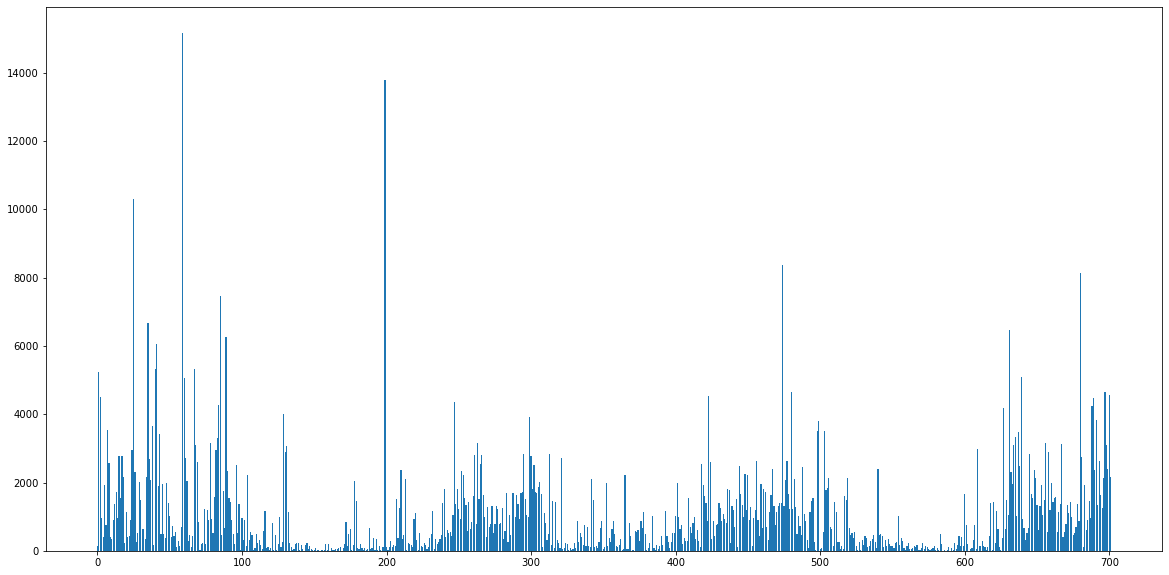

In [34]:
qtyList = []
for type, type_df in transDetailsdf.groupby('TransType'):
    if(type=='SALE'):
        for TransDate, TransDate_df in type_df.groupby('TransDate'):
            qtyList.append(TransDate_df['Qty'].sum()) #, TransDate_df['TransType'])

qtyArr = np.array(qtyList)

#draw barplot
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

plt.bar(np.arange(len(qtyArr)), qtyArr)
plt.show()

In [35]:
print('per day sell prediction in qty: ')
print(np.median(qtyArr))
#print(np.mean(qtyArr))

per day sell prediction in qty: 
537.5


<h2>per day sell prediction in Amount(money):<h2>

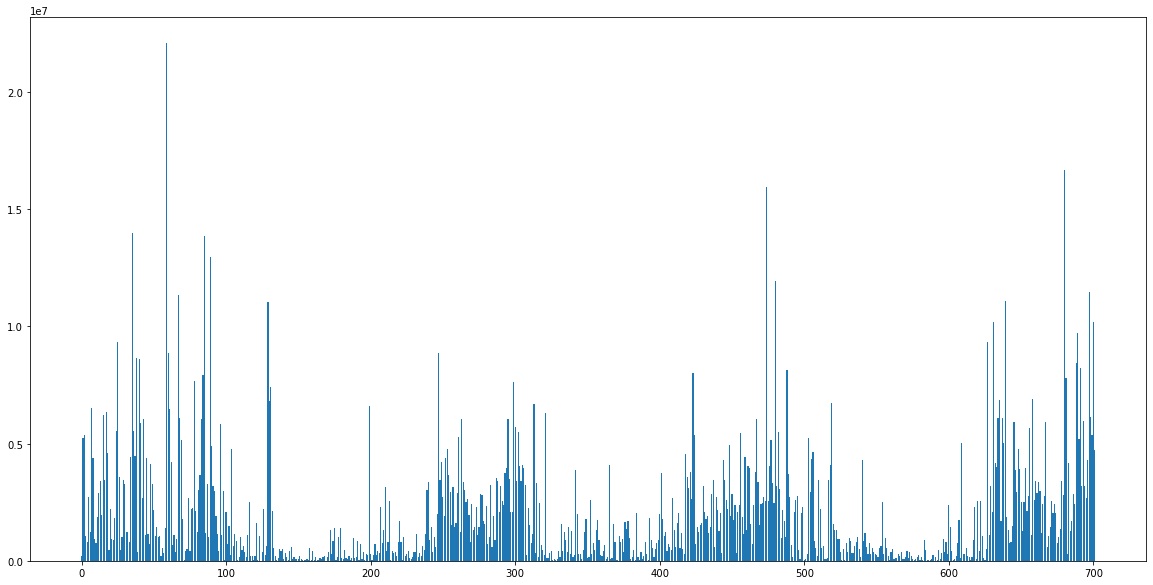

In [36]:
amountList = []
for type, type_df in transDetailsdf.groupby('TransType'):
    if(type=='SALE'):
        for TransDate, TransDate_df in type_df.groupby('TransDate'):
            amountList.append(TransDate_df['Amount'].sum()) #, TransDate_df['TransType'])

amountArr = np.array(amountList)

#draw barplot
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

plt.bar(np.arange(len(amountArr)), amountArr)
plt.show()

In [37]:
print('per day sell prediction in money(amount): ')
print(np.median(amountArr))
#print(np.mean(amountArr))

per day sell prediction in money(amount): 
1061857.5


<h2>the end.<h2>